## Model Training

### Data Reading

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv("df_final.csv")

In [6]:
df.head()

,DATE,p_saving_rate,target,mortgage_rate,IPI_Cement,PPI_Cement,permit,PPI_Concrete,population,new_private_house,...,new_private_hw_under,GDP,home_ow_rate,house_st,total_emp_cons,labor_percent,all_Const_Emp,monthly_supply,unemployed_rate,MSPUS
0,1987-01-01,9.4,63.735,9.2040,123.7373,100.1,1690.0,4.703204,241857.0,7974.739004,...,1090.0,4722.156,63.9,1774.0,5007.0,65.4,722.3,6.0,6.6,97900.0
1,1987-02-01,8.2,64.135,9.0825,123.1670,100.8,1689.0,4.703204,242005.0,7502.244305,...,1096.0,4722.156,63.9,1784.0,5038.0,65.5,724.2,6.2,6.6,97900.0
2,1987-03-01,8.1,64.470,9.0350,122.5706,101.2,1704.0,4.703204,242166.0,7106.570176,...,1084.0,4722.156,63.9,1726.0,5039.0,65.5,727.9,6.0,6.6,97900.0
3,1987-04-01,4.1,64.973,9.8325,123.5345,100.8,1601.0,4.703204,242338.0,7316.773819,...,1079.0,4806.160,63.9,1614.0,5053.0,65.4,728.1,6.0,6.3,103400.0
4,1987-05-01,7.8,65.547,10.5960,123.8454,101.2,1500.0,4.697749,242516.0,7203.844501,...,1070.0,4806.160,63.9,1628.0,5080.0,65.7,727.6,6.7,6.3,103400.0


### Data splitting and Scaling

In [7]:
X = df.drop(columns=['DATE', 'target'], axis=1)
y = df.target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Training

In [10]:
lasso_cv_model = LassoCV(alphas=np.logspace(-4, 4, 100),cv=5)

lasso_cv_model.fit(X_train, y_train)

lasso_cv_predictions = lasso_cv_model.predict(X_test)

/Users/pritamk/dataScience/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185.06929127610238, tolerance: 89.04443549183965
  model = cd_fast.enet_coordinate_descent_gram(
/Users/pritamk/dataScience/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113.93178989817216, tolerance: 89.04443549183965
  model = cd_fast.enet_coordinate_descent_gram(
/Users/pritamk/dataScience/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.018e+03, tolerance: 1.218e+02
  model = cd_fas

In [11]:
optimal_alpha = lasso_cv_model.alpha_

mse = mean_squared_error(y_test, lasso_cv_predictions)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, lasso_cv_predictions)

print(f"Optimal Alpha: {optimal_alpha:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"RMSE: {rmse:2f}")
print(f"R-squared (R2): {r2:.2f}")

Optimal Alpha: 0.0126
Mean Squared Error (MSE): 15.33
RMSE: 3.914926
R-squared (R2): 1.00


### Cross validation

In [12]:
cross_val_scores = cross_val_score(lasso_cv_model, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R-squared Scores:")
print(cross_val_scores)

/Users/pritamk/dataScience/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129.69656366069376, tolerance: 74.21987913840002
  model = cd_fast.enet_coordinate_descent_gram(
/Users/pritamk/dataScience/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98.88460155688881, tolerance: 74.21987913840002
  model = cd_fast.enet_coordinate_descent_gram(
/Users/pritamk/dataScience/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82.5306306839866, tolerance: 74.21987913840002
  model = cd_fast.enet_coordinate_descent_gram(
/Users/pritamk/dataScienc

/Users/pritamk/dataScience/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.828e+03, tolerance: 8.904e+01
  model = cd_fast.enet_coordinate_descent(
/Users/pritamk/dataScience/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151.771359620343, tolerance: 73.96557032254285
  model = cd_fast.enet_coordinate_descent_gram(
/Users/pritamk/dataScience/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90.08529111573625, tolerance: 73.96557032254285
  model = cd_fast.enet_c

Cross-Validation R-squared Scores:
[0.99504332 0.99512056 0.99388628 0.99191416 0.99445333]


/Users/pritamk/dataScience/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.200e+03, tolerance: 1.032e+02
  model = cd_fast.enet_coordinate_descent(
/Users/pritamk/dataScience/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116.67684280872982, tolerance: 65.82032625745536
  model = cd_fast.enet_coordinate_descent_gram(
/Users/pritamk/dataScience/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 145.72521282780554, tolerance: 74.52942097397599
  model = cd_fast.ene

In [13]:
mean_r2 = cross_val_scores.mean()
std_r2 = cross_val_scores.std()

print(f"Mean R-squared: {mean_r2:.4f}")
print(f"Standard Deviation of R-squared: {std_r2:.4f}")

Mean R-squared: 0.9941
Standard Deviation of R-squared: 0.0012


In [14]:
print(0.1 * rmse)
print(0.1 * df['target'].mean()) # rmse should be less than the 10% of mean of target variable

0.39149256705152913
14.11514874715262


### Most Prominent features and least prominent features

In [15]:
# coefficients and corresponding feature names
lasso_coefficients = lasso_cv_model.coef_
feature_names = X.columns

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coefficients})

non_zero_coefficients_df = coefficients_df[coefficients_df['Coefficient'] != 0]
zero_coefficients_df = coefficients_df[coefficients_df['Coefficient'] == 0]

In [16]:
non_zero_coefficients_df

,Feature,Coefficient
0,p_saving_rate,-0.932089
1,mortgage_rate,-1.597705
2,IPI_Cement,1.972511
3,PPI_Cement,-5.479726
4,permit,-0.605610
5,PPI_Concrete,17.576686
6,population,-10.890297
8,emratio,-6.519240
9,income,0.885070
10,new_private_hw_under,7.697529


In [17]:
zero_coefficients_df

,Feature,Coefficient
7,new_private_house,-0.0
13,house_st,-0.0


### Predicted vs Observed

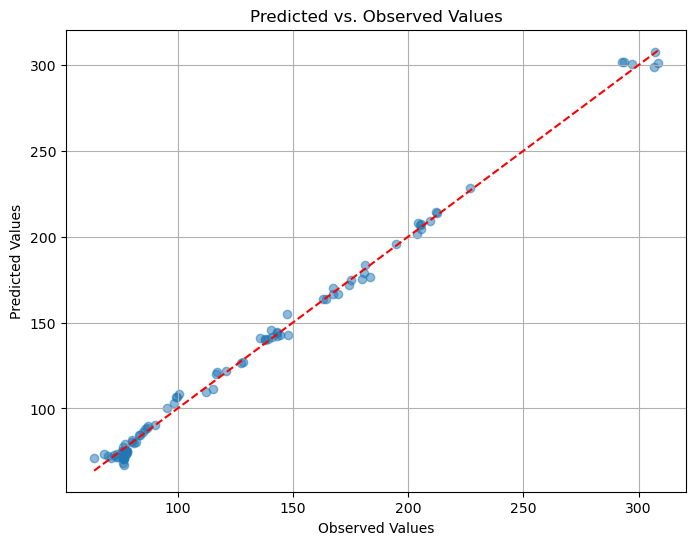

In [18]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, lasso_cv_predictions, alpha=0.5)
plt.xlabel("Observed Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Observed Values")
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, color='red', linestyle='--')

plt.show()